In [13]:
import metapack as mp
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
pkg = mp.jupyter.open_package()
pkg

In [5]:
df = pkg.resource('ps_extract').dataframe()

In [7]:
df.head()

,geoid,land_area,total_population,population_5_17,population_nh_white,population_college_degree,median_household_income,aggregate_household_income,average_agg_household_income,average_agg_house_value
0,14000US06073000100,0.595,2773,294,2276,1681,127353.0,283406300.0,220036.0,1005837.0
1,14000US06073000201,0.334,2158,140,1628,1139,98669.0,119734300.0,114798.0,389221.0
2,14000US06073000202,0.506,4828,449,3477,2474,61381.0,211142900.0,90542.0,270988.0
3,14000US06073000300,0.349,4946,111,3437,2676,63667.0,240566100.0,85733.0,175043.0
4,14000US06073000400,0.456,3916,194,2655,1881,67794.0,197192600.0,90705.0,120083.0


In [9]:
df['pop_density'] = df.total_population / df.land_area
df['hh_income_density'] = df.aggregate_household_income /  df.land_area
df['student_density'] = df.population_5_17 /  df.land_area

In [10]:
tracts = pkg.reference('tracts').geoframe()

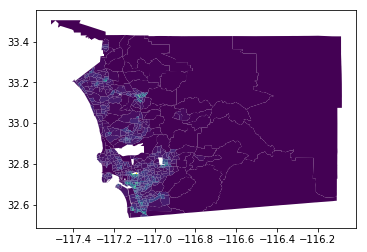

In [18]:
gdf = tracts.set_index('geoid').join(df.set_index('geoid'))
gdf.dropna().plot(column='student_density')

In [17]:
df.head().T

,0,1,2,3,4
geoid,14000US06073000100,14000US06073000201,14000US06073000202,14000US06073000300,14000US06073000400
land_area,0.595,0.334,0.506,0.349,0.456
total_population,2773,2158,4828,4946,3916
population_5_17,294,140,449,111,194
population_nh_white,2276,1628,3477,3437,2655
population_college_degree,1681,1139,2474,2676,1881
median_household_income,127353,98669,61381,63667,67794
aggregate_household_income,2.83406e+08,1.19734e+08,2.11143e+08,2.40566e+08,1.97193e+08
average_agg_household_income,220036,114798,90542,85733,90705
average_agg_house_value,1.00584e+06,389221,270988,175043,120083


In [19]:
import fiona; fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [20]:
gdf.to_csv('students.csv')